### Ineffectiveness on Datasets Too Small
This notebook is used for demonstrating a dataset too small is not capable of using the pipeline we proposed. We used groups B and D from previous experiments for demonstration to compare the effect of having too small a dataset even when an even distribution is achieved by oversampling techniques. The total number of original samples is limited to 100 with a 0.2 ratio for the minority class. The oversampling ratio is chosen to be 4, achieving a 80:80 distribution between the two classes overall. 

In [6]:
from common_base import read_data, binarise
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

In [39]:
group_b = ['panelb_ca15_3', 'panelb_ca19_9', 'panelb_ca72_4', 'panelb_klk6', 'panelb_he4', 'panelb_ov_110']
group_d = ['paneld_b2m', 'paneld_apo', 'panele_eotaxin', 'panele_mmp_3', 'panele_egfr']


In [60]:
# Group B small
DATA_PATH = "../results/plco/correct_pipeline/smote_xgb/ineffective_small_100_2_B"
tests_b = []
test_scores = []

repo = DATA_PATH + "/test/"
for i in range(0, 30):
    model_name = repo+f"smote_xgb_{i}_special_clf.pkl"
    test_file_name = repo+f"smote_xgb_{i}_special.pkl"

    with open(test_file_name, "rb") as f:
        test_result = pickle.load(f)
        test_data = test_result["new_data"]
        threshold = test_result["threshold"]
    with open(model_name, "rb") as f:
        model = pickle.load(f)
    test_data_features = test_data[group_b]
    test_data_labels = test_data["is_case"]
    Y_pred = model.predict(test_data_features)
    test_scores.append(roc_auc_score(test_data_labels, Y_pred))
tests_b.append(test_scores)

In [61]:
# Group D small
DATA_PATH = "../results/plco/correct_pipeline/smote_xgb/ineffective_small_100_2_D"
tests_d = []
test_scores = []

repo = DATA_PATH + "/test/"
for i in range(0, 30):
    model_name = repo+f"smote_xgb_{i}_special_clf.pkl"
    test_file_name = repo+f"smote_xgb_{i}_special.pkl"

    with open(test_file_name, "rb") as f:
        test_result = pickle.load(f)
        test_data = test_result["new_data"]
        threshold = test_result["threshold"]
    with open(model_name, "rb") as f:
        model = pickle.load(f)
    test_data_features = test_data[group_d]
    test_data_labels = test_data["is_case"]
    Y_pred = model.predict(test_data_features)
    test_scores.append(roc_auc_score(test_data_labels, Y_pred))
tests_d.append(test_scores)

In [62]:
# Group B Full Size
DATA_PATH = "../results/plco/correct_pipeline/smote_xgb/groupB/over"
tests_b_full = []

for ratio in range(7, 8):
    # Test Results of the threshold tuning
    repo = DATA_PATH+f"{ratio}/test/"
    test_scores = []
    for i in range(0, 30):
        file_name = repo+f"smote_xgb_{i}.pkl"
        result, model = None, None
        with open(file_name, "rb") as f:
            result = pickle.load(f)
            Y_pred = binarise(result["Y_pred_proba"], result["threshold"])
            test_scores.append(roc_auc_score(result["Y_test"], Y_pred))
    tests_b_full.append(test_scores)
    
# Group D Full Size
DATA_PATH = "../results/plco/correct_pipeline/smote_xgb/verify_D/verify_oversample"
tests_d_full = []

for ratio in range(7, 8):
    # Test Results of the threshold tuning
    repo = DATA_PATH+f"{ratio}_D/test/"
    test_scores = []
    for i in range(0, 30):
        file_name = repo+f"smote_xgb_{i}_special.pkl"
        result, model = None, None
        with open(file_name, "rb") as f:
            result = pickle.load(f)
            Y_pred = binarise(result["Y_pred_proba"], result["threshold"])
            test_scores.append(roc_auc_score(result["Y_test"], Y_pred))
    tests_d_full.append(test_scores)

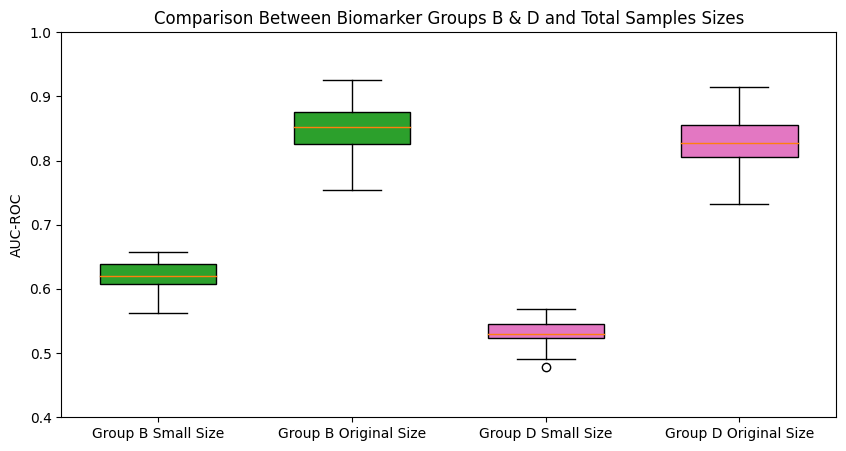

In [71]:
# Tests
fig, ax = plt.subplots(figsize=(10, 5))
bp_b_small = ax.boxplot(tests_b, widths=0.6, positions=[0],
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["Group B Small Size"])

bp_b_full = ax.boxplot(tests_b_full, widths=0.6, positions=[1],
                 patch_artist=True, boxprops=dict(facecolor="C2"), labels=["Group B Original Size"])

bp_d_small = ax.boxplot(tests_d, widths=0.6, positions=[2],
                 patch_artist=True, boxprops=dict(facecolor="C6"), labels=["Group D Small Size"])

bp_d_full = ax.boxplot(tests_d_full, widths=0.6, positions=[3],
                 patch_artist=True, boxprops=dict(facecolor="C6"), labels=["Group D Original Size"])

plt.title("Comparison Between Biomarker Groups B & D and Total Samples Sizes")
plt.ylim(0.4, 1)

plt.ylabel("AUC-ROC")
plt.show()

### Conclusion
Smaller sizes to start with has a much higher chance of getting overfitting issues, meaning the results reported from their test sets are often very limited to their specific data distribution and lacks generalisation. As a general rule in machine learning, the more data to train the model, the more likely the result is going to be reliable. 